In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df=pd.read_csv('International_Report_Passengers.csv').copy()

In [15]:
df

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2014,2014,5,14492,RDU,36,11032,CUN,148,19534,AM,0,Passengers,0,315,315
1,06/01/2007,2007,6,13204,MCO,33,16085,YHZ,951,20364,C6,0,Passengers,0,683,683
2,12/01/2005,2005,12,11433,DTW,43,10411,AUA,277,20344,RD,1,Passengers,0,1010,1010
3,04/01/2003,2003,4,13487,MSP,63,16304,ZIH,148,20204,MG,1,Passengers,0,508,508
4,12/01/2005,2005,12,12016,GUM,5,11138,CRK,766,20312,TZ,1,Passengers,0,76,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680980,10/01/2015,2015,10,12478,JFK,22,12972,LHR,493,19540,BA,0,Passengers,130217,0,130217
680981,09/01/2014,2014,9,12478,JFK,22,12972,LHR,493,19540,BA,0,Passengers,132052,0,132052
680982,10/01/2014,2014,10,12478,JFK,22,12972,LHR,493,19540,BA,0,Passengers,132822,0,132822
680983,08/01/2014,2014,8,12478,JFK,22,12972,LHR,493,19540,BA,0,Passengers,134263,0,134263


In [4]:
df.isna()

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680980,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
680981,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
680982,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
680983,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)

# Or fill missing values with mean, median, mode, or a constant value
df.fillna(df.mean(), inplace=True) # fill with mean
df.fillna(df.median(), inplace=True) # fill with median
df.fillna(df.mode().iloc[0], inplace=True) # fill with mode
df.fillna(0, inplace=True) # fill with zero

data_dte           0
Year               0
Month              0
usg_apt_id         0
usg_apt            0
usg_wac            0
fg_apt_id          0
fg_apt             0
fg_wac             0
airlineid          0
carrier         2797
carriergroup       0
type               0
Scheduled          0
Charter            0
Total              0
dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_9032\1782737252.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True) # fill with mean
C:\Users\DELL\AppData\Local\Temp\ipykernel_9032\1782737252.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.median(), inplace=True) # fill with median


In [9]:
df['fg_apt_id'] = pd.to_datetime(df['fg_apt_id'])
print(df.dtypes)

data_dte        datetime64[ns]
Year                     int64
Month                    int64
usg_apt_id               int64
usg_apt                 object
usg_wac                  int64
fg_apt_id       datetime64[ns]
fg_apt                  object
fg_wac                   int64
airlineid                int64
carrier                 object
carriergroup             int64
type                    object
Scheduled                int64
Charter                  int64
Total                    int64
dtype: object


In [16]:
df=df.sort_values(by=['Year', 'Month']).reset_index()

df.drop("index", axis=1, inplace=True)

df = df.loc[df.Year < 2015]

In [17]:
df.head(100)

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,01/01/1990,1990,1,11042,CLE,44,11032,CUN,148,19892,ACQ,0,Passengers,0,796,796
1,01/01/1990,1990,1,12264,IAD,38,14739,SDQ,224,20312,TZ,1,Passengers,0,191,191
2,01/01/1990,1990,1,11697,FLL,33,11760,FRA,429,20120,DFQ,0,Passengers,0,1258,1258
3,01/01/1990,1990,1,11252,DAB,33,16217,YUL,941,19506,ND,0,Passengers,0,237,237
4,01/01/1990,1990,1,14107,PHX,81,11032,CUN,148,19892,ACQ,0,Passengers,0,513,513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,01/01/1990,1990,1,11618,EWR,21,11032,CUN,148,19892,ACQ,0,Passengers,0,772,772
96,01/01/1990,1990,1,13930,ORD,41,11032,CUN,148,19684,INQ,1,Passengers,0,2581,2581
97,01/01/1990,1990,1,12003,GTF,84,16042,YEG,916,19829,KI,0,Passengers,0,130,130
98,01/01/1990,1990,1,12478,JFK,22,12026,GVA,486,19528,BBQ,0,Passengers,0,254,254


In [24]:
count=df['Year'].value_counts()

In [25]:
count

2014    25843
2011    24516
2013    24464
2007    24143
2012    24070
2008    23829
2006    23553
2010    23551
2005    22822
2009    22308
2004    22115
2003    20776
2000    20709
1998    20518
1999    20436
2001    19780
1997    19697
1996    19306
1995    18753
1994    18368
2002    18280
1993    18062
1992    17382
1990    16455
1991    16355
Name: Year, dtype: int64

In [26]:
count=pd.DataFrame(count)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


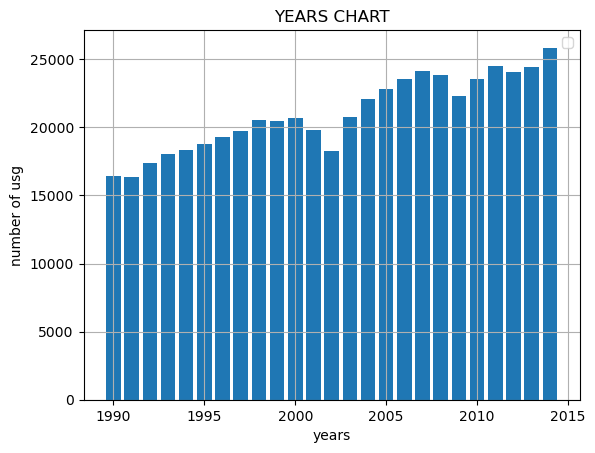

In [30]:
plt.bar(count.T.columns,count['Year'])
plt.xlabel("years")
plt.ylabel("number of usg")
plt.title("YEARS CHART")
plt.legend()
plt.grid(True)
plt.show()

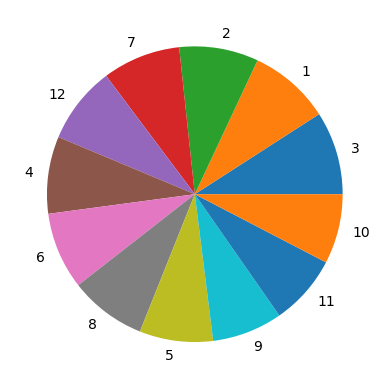

In [12]:

counts=df['Month'].value_counts()
counts.index.values.tolist()
plt.pie(counts,labels=counts.index.values.tolist())
plt.show()

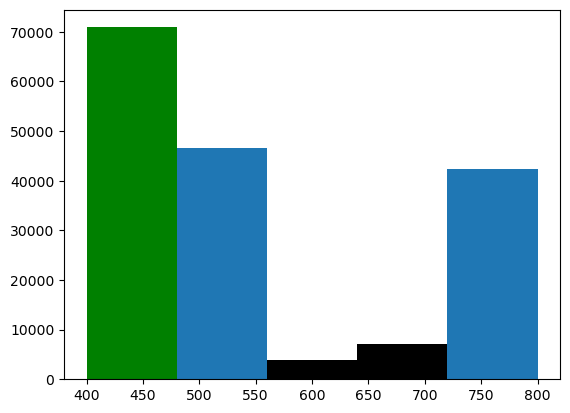

In [41]:
v,b,p = plt.hist(df['fg_wac'],bins=5,range=[400,800])
for i in range(0,1):
    p[i].set_facecolor('g')
for i in range(2,4):
    p[i].set_facecolor('black')
plt.show()

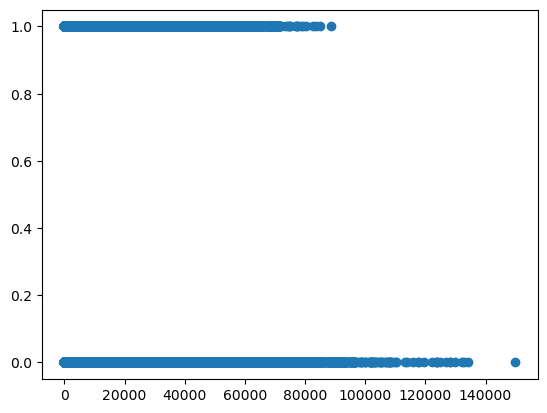

In [46]:
plt.scatter(df['Scheduled'],df['carriergroup'])